In [1]:
from torchvision import datasets,transforms,utils
from torch.utils import data
# torch.utils.data - 데이터셋의 표준을 정의하고 데이터셋을 불러오고 자르고 섞는 데 사용하는 모듈
# torchvision.datasets - torch.utils.data.Dataset을 상속하는 이미지 데이터셋의 모음  (패션 아이템 데이터셋이 포함됨) 
# torchvision.transfoms- 이미지 데이터셋에 사용할 수 있는 여러가지 변환 필터를 담고 있는 모듈
# torchvision.utils - 이미지 데이터를 저장하고 시각화하기 위한 도구가 들어 있는 모듈 

import matplotlib.pyplot as plt
import numpy as np

In [2]:
## 이미지를 텐서로 바꾸는 코드 
transform = transforms.Compose([
    transforms.ToTensor()
])
# ToTensor로 이미지를 파이토치 텐서로 변환하고
# Compose로 만들어 둔 이미지 변환 설정을 적용하는 데 쓰인다. 

In [6]:
## FashionMNIST 데이터셋을 가져온다.

trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True, # 학습용 트레이닝 셋 
    download = True, 
    transform = transform
)
# download = True로 설정해서 
# 자동으로 root 로 지정한 폴더 ( './.data/', ) 에 
# 데이터셋이 없다면 자동으로 다운로드 

testset = datasets.FashionMNIST(
    root = './.data/',
    train = False, # 성능 평가용 트레이닝 셋
    download = True,
    transform = transform
)

# FashionMNIST 데이터셋은 학습용 트레이닝 셋과 성능 평가용 트레이닝 셋으로 
# 나뉘어 있어서 train 값으로 선택한다. 

In [7]:
## DataLoader 사용 

#torchvision.datasets 으로 생성된 객체는 
#파이토치 내부 클래스 'torch.utils.data.Dataset'을 상속
#따라서, 파이토치의 'DataLoader' 즉, 데이터셋을 로딩하는 클래스에 넣어 바로 사용가능
#DataLoader는 데이터 셋을 배치라는 작은 단위로 쪼개서
#반복 학습 시에 데이터를 공급하는 클래스 

batch_size = 16 
# 반복마다 이미지 16개씩 읽음 

train_loader = data.DataLoader (
    dataset = trainset,
    batch_size = batch_size
)


test_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)


In [8]:
dataiter = iter (train_loader)
#iter()를 이용해서 반복문에서 사용할 수 있게 함
images, labels = next(dataiter)
#next()를 이용해 배치 1개를 가져온다. 
#images 와 labels 에는 앞서 설ㄹ정한 배치 크기 만큼 이미지 16개 +레이블 16개 

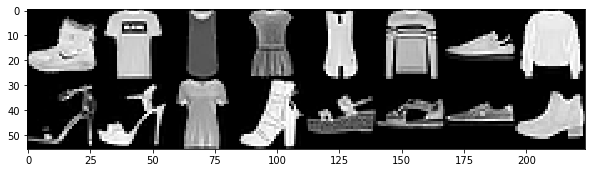

In [9]:
img = utils.make_grid(images,padding = 0) 
#utils.make_grid()로 여러 이미지를 모아 하나의 이미지로 만들 수 있다. 
npimg = img.numpy() 
# numpy()로 matplotlib.pyplot과 호환되는 넘파이 행렬로 바꿔줌
# img (파이토치 텐서) - >  npimg( 넘파이 행렬)
plt.figure(figsize=(10,7))
# plt.figure()로 이미지가 들어갈 자를 만든다. 
plt.imshow(np.transpose(npimg,(1,2,0)))
# matplotlib.pyplot이 인식하는 차원의 순서가 다르기 떄문에 
# np.transpose() 함수를 이요해 첫 번째(0번쟤) 차원을 맨 뒤로 보냄
plt.show()
# plt.imshow()  -> plt.show()
# 함수를 순서대로 호출해서 주피터 노트북에서 이미지 확인 

In [10]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [11]:
CLASSES = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}
# 해석하기 쉽게 레이블을 숫자 번호에서 이름으로 
# 딕셔너리 생성
for label in labels:
    index = label.item()
    print(CLASSES[index])
# 앞서 사용한 labels의 영문 텍스트를 출력 

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


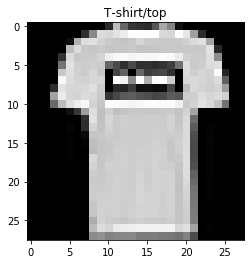

In [12]:
idx = 1
item_img = images[idx]
# MINST 데이터셋에서 첫번쨰 이미지를 꺼낸다.
item_npimg = item_img.squeeze().numpy()
# squeeze()와 numpy()를 이용해 
# matplotlib.pyplot에서 이용이 가능한 numpy 행렬을 만든다.
plt.title(CLASSES[labels[idx].item()])
# 앞서 만들어둔 딕셔너리를 이용해 레이블 번호를 문자로 바꿈
plt.imshow(item_npimg, cmap='gray')
plt.show()
#이미지를 확인 